# Introduction 
biodiversity data from the National Parks Service, particularly around various species observed in different national park locations

My Questions to seek:
- What is the percentage of each conservation_status for species
- How each category is distributed into conservation_status
- Are the differences between species and their conservation status significant
- Which animal is most prevalent and what the distribution for this animal is across each park

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts(sum)
1. relationship between species with chi_2
1. conservation status of species
1. observations of species in parks. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
observation=pd.read_csv("observations.csv")
species=pd.read_csv("species_info.csv")

# Data Characteristics
observation data
- it has 23296 entries with 3 columns
- two are object dtype, and the other, obseravtions, is int64 dtype
- there are no null values (e.g, nan)
- there are 4 observations at 4 different parks for each species(5824 species_name with 4 entries=23296 entries)

species data
- it has 5824 entries with 4 columns
- all columns are object dtype
- conservation_status has only 191 entries (non_null)
- category values are nominal, ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
- conservation_status has [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [3]:
print(observation.head())
print(observation.info())
print(observation.scientific_name.unique())
print(observation.park_name.unique())
print(observation.observations.unique())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
['Grea

In [4]:
print(species.head())
print(species.info())
print(species.category.unique())
print(species.scientific_name.unique())
print(species.common_names.unique())
print(species.conservation_status.unique())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

Analyze the first dataset 'species'

- first we need to replace nan value in conservation_status
- conservation_status is ordinal variabe, so we can represent it as categorical value(but in recovery makes it difficult) 

In [5]:
species.conservation_status.fillna(value='No Intervention', inplace=True)

#species.conservation_status=pd.Categorical(species.conservation_status, categories=['No Intervention','Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],ordered=True)

Let's take a look at the ratio of each status

In [6]:
conservation_status_cross=pd.crosstab(species.conservation_status, columns='conservation_status')
conservation_status_cross['ratio']=conservation_status_cross.conservation_status.apply(lambda entry: entry/conservation_status_cross.sum()*100.00)

currently there are 16 endangered species, 4 species in recovery, 161 species in concern, and 10 threatened species.

In [7]:
conservation_status_cross

col_0,conservation_status,ratio
conservation_status,,
Endangered,16,0.274725
In Recovery,4,0.068681
No Intervention,5633,96.720467
Species of Concern,161,2.764423
Threatened,10,0.171703


Now, let's dig deeper about what the proportion is all numbers above.
We can remove 'No Intervention' value because we are curious about those endangered species.


We can see 3 bird species and 1 mammal species are in recovery.

Bird has the most endangered species-->79.0

Vascular Plant                      -->46.0

Mammal                              -->38.0

The graph shows vividly that Bird species are very endangered

In [8]:
categorical_conservation_status=species[species.conservation_status!='No Intervention'].groupby(['conservation_status', 'category']).scientific_name.count().unstack()
print(categorical_conservation_status)
print(categorical_conservation_status.sum(axis=0))

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  
category
Amphibian             7.0
Bird                 79.0
Fish                 11.0
Mammal               38.0
Nonvascular Plant     5.0
Reptile               5.0
Vascular Plant       46.0
dtype: float64


Text(0, 0.5, 'Number of Species')

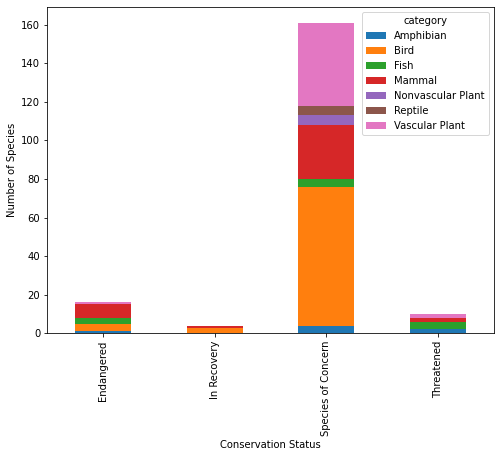

In [9]:
ax = categorical_conservation_status.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

Now we need to analyze this difference among category is significant or not.

As we can see in the proportion of each category under the protection, mammal has the largest proportion.

Result of chi2:
- Mammal and Bird do not have significant difference
- Bird has significant difference if the category has proportion less than 0.015
- Mammal has significant difference if the category has proportion less than 0.086

In [10]:
species['under_the_protection']=species.conservation_status.apply(lambda entry: True if entry != 'No Intervention' else False)
category_protected_crosstab=pd.crosstab(species.category, species.under_the_protection)
category_protected_crosstab.columns=['no_protection','under_the_protection']
category_protected_crosstab_prop=category_protected_crosstab.copy()
category_protected_crosstab_prop['proportion']=category_protected_crosstab_prop.apply(lambda row: row.under_the_protection/row.sum(), axis=1)

In [11]:
category_protected_crosstab_prop

,no_protection,under_the_protection,proportion
category,,,
Amphibian,73,7,0.087500
Bird,442,79,0.151631
Fish,116,11,0.086614
Mammal,176,38,0.177570
Nonvascular Plant,328,5,0.015015
Reptile,74,5,0.063291
Vascular Plant,4424,46,0.010291


In [12]:
from scipy.stats import chi2_contingency
for index_0 in category_protected_crosstab.index:
    for index_1 in category_protected_crosstab.index:
        chi2, pval, dof, expected=chi2_contingency(category_protected_crosstab.loc[[index_0, index_1]])
        if pval<0.05:
            print(index_0, index_1, pval)


Amphibian Nonvascular Plant 0.001965876648469202
Amphibian Vascular Plant 4.808329919269597e-09
Bird Nonvascular Plant 1.355139751924416e-10
Bird Vascular Plant 9.296288431402029e-84
Fish Mammal 0.031145264082780604
Fish Nonvascular Plant 0.0005357944004524846
Fish Vascular Plant 3.9307221656919953e-13
Mammal Fish 0.031145264082780604
Mammal Nonvascular Plant 1.6818930744695664e-11
Mammal Reptile 0.02338465214871547
Mammal Vascular Plant 1.7349112437604003e-70
Nonvascular Plant Amphibian 0.001965876648469202
Nonvascular Plant Bird 1.3551397519244125e-10
Nonvascular Plant Fish 0.0005357944004524846
Nonvascular Plant Mammal 1.6818930744695664e-11
Nonvascular Plant Reptile 0.03571937673410538
Reptile Mammal 0.02338465214871547
Reptile Nonvascular Plant 0.03571937673410538
Reptile Vascular Plant 9.772802684315545e-05
Vascular Plant Amphibian 4.808329919269614e-09
Vascular Plant Bird 9.296288431402292e-84
Vascular Plant Fish 3.9307221656919953e-13
Vascular Plant Mammal 1.73491124376035e-70


We also need to analyze what animals are most prevalent to see observations across four parks

Let's make a dataset to count the occurece of names

In [113]:
import string

def find_prevalent_animal(category):
    common_names=species[species.category==category].common_names
    split_names=[]
    for names in common_names:
        for punctuation in string.punctuation:
            names=names.replace(punctuation, '')
        names=names.split(' ')
        split_names.append(names)
    clean_data=[]
    split_data=[]
    for name_row in split_names:
        for item in name_row:
            split_data.append(item)
            if item not in clean_data:
                clean_data.append(item)
    words_count=[]
    for name in clean_data:
        count=split_data.count(name)
        words_count.append((name, count))
    words_count=pd.DataFrame(words_count, columns=['Name','Count']).sort_values('Count', ascending=False).reset_index()
    return words_count

Choose the highest occurence and merge the dataset with observation to check how many observations this animal has across each park

In [163]:
import re
def extract_prevalent_animal(category):
    mammal_count=find_prevalent_animal(category)
    rege=r"\b" + re.escape(mammal_count.iloc[0].Name) + r"\b"
    name=mammal_count.iloc[0].Name
    species['is_animal_name_in']=species.common_names.str.contains(rege,regex=True, case=False)
    prevalent_dataset=species[species.is_animal_name_in].reset_index()
    prevalent_dataset.drop(columns=['index'], inplace=True)
    print(len(prevalent_dataset))
    prevalent_dataset=prevalent_dataset.merge(observation)
    return name, prevalent_dataset


Example of Mammal:
- The most prevalent animal is Bat
- Bryce has 3433, Great Smoky has 2411, Yellowstone has 8362, and Yosemite has 4786
- 23 diffrent kinds of Bat 
- all parks have less number of under_the_protection bat than number of animals without protection
- Yellowstone has the most bat no matter if it is protected or not

In [164]:
name, observation_dataset=extract_prevalent_animal("Mammal")
observation_dataset.groupby(['park_name']).observations.sum().reset_index()

23


,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [165]:
observation_dataset.groupby(['park_name','under_the_protection']).observations.sum().reset_index()

,park_name,under_the_protection,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


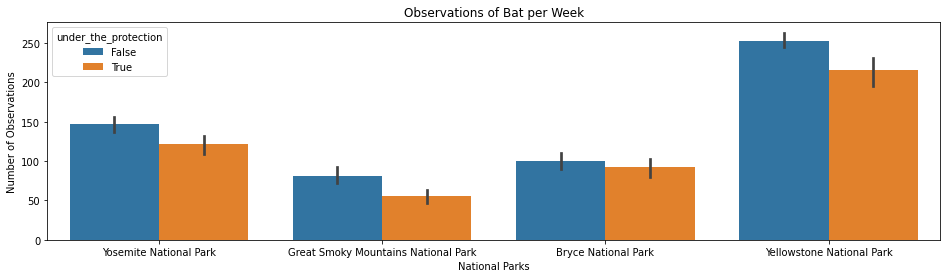

In [166]:
plt.figure(figsize=(16, 4))
sns.barplot(x=observation_dataset.park_name, y= observation_dataset.observations, hue=observation_dataset.under_the_protection)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of '+name+' per Week')
plt.show()

The example of Bird:
- The most prevalent animal is Warbler
- Bryce has 5760, Great Smoky Mountains has 4435, Yellowstone has 14487, and Yosemite has 8712
- As well as Bat, Yellowstone has the most obervation
- Observations of endangered birds are lower than observations of not-protected birds

In [170]:
name, observation_dataset=extract_prevalent_animal("Bird")
print(name)
observation_dataset.groupby(['park_name']).observations.sum().reset_index()

59
Warbler


,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


In [168]:
observation_dataset.groupby(['park_name','under_the_protection']).observations.sum().reset_index()

,park_name,under_the_protection,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


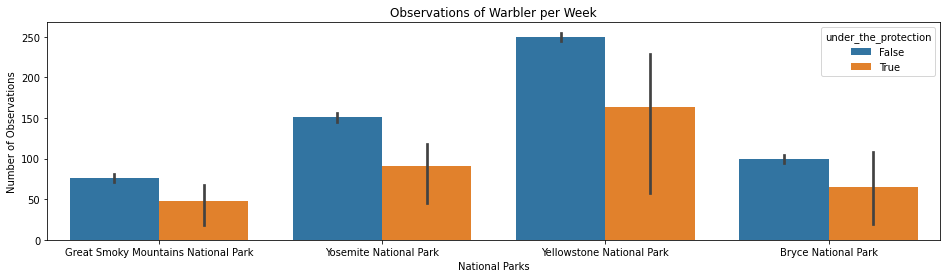

In [169]:
plt.figure(figsize=(16, 4))
sns.barplot(x=observation_dataset.park_name, y= observation_dataset.observations, hue=observation_dataset.under_the_protection)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of '+name+' per Week')
plt.show()

# Conclusion
The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

Answer for each questions:
- What is the percentage of each conservation_status for species
    - Endangered    0.274725%
    - In Recovery	0.068681%
    - No Intervention   96.720467%
    - Species of Concern    2.764423%
    - Threatened	0.171703%
    - The majority of species are not a part of conservation (5633 vs 191)
- How each category is distributed into conservation_status
    - Amphibian	73	7	8.7500%     --> 73 species are not protected. 7 species are under the protection. The percentage of protected species is 8.75%
    - Bird	442	79	15.1631%        --> 442 species are not protected. 79 species are under the protection. The percentage of protected species is 15.1631%
    - Fish	116	11	8.6614%         --> 116 species are not protected. 11 species are under the protection. The percentage of protected species is 8.6614%
    - Mammal	176	38	17.7570%    --> 176 species are not protected. 38 species are under the protection. The percentage of protected species is 17.757%
    - Nonvascular Plant	328	5	1.5015%     --> 328 species are not protected. 5 species are under the protection. The percentage of protected species is 1.5015%
    - Reptile	74	5	6.3291%     --> 74 species are not protected. 5 species are under the protection. The percentage of protected species is 6.3291%
    - Vascular Plant	4424	46	1.0291%     --> 4424 species are not protected. 46 species are under the protection. The percentage of protected species is 1.0291%
    - Bird, Vascular Plant and Mammal have the highest number of protection, but only Mammal and Bird have the highest percentage of protected species against a wholsome.
- Are the differences between species and their conservation status significant
    - Mammal and Bird do not have a significant difference
    - Bird has significant difference if the category has the proportion less than 1.5016%
    - Mammal has significant difference if the category has the proportion less than 8.6614% 
- Which animal is most prevalent and what the distribution for this animal is across each park
    - In the case of Mammal, Bat is the most prevalent species.
    - In the case of Bird, Warbler is the most prevalent species.
    - Yellowstone National park has the largest number of both species. 
    